<a href="https://colab.research.google.com/github/blakelobato/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Blake_Lobato_DS_Unit_1_Sprint_Challenge_1_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [1]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [14]:
# TODO
import pandas as pd
import numpy as np

#df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data') #loads the data as a pandas data frame 
col_names = ['Age', 'Year of Op', 'Num + Nodes Detected', 'Survival Class'] #creates column names form data description
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',names=col_names) #creates the dataframe with proper headers // informative names to the futures
df.head(10)


,Age,Year of Op,Num + Nodes Detected,Survival Class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [10]:
df.shape #checks with data description from UCI for total counts and columns

(306, 4)

In [11]:
df.isnull().sum() #checks that there are no missing values

Age                     0
Year of Op              0
Num + Nodes Detected    0
Survival Class          0
dtype: int64

In [0]:
def change_1_to_0(x): #define a function to change values from 1 to 0 and 2 to 1 in a traditional binary method
  if x ==1:
    return 0
  else:
    return 1

In [0]:
df['Survival Class'] = df['Survival Class'].apply(change_1_to_0) #change to traditional binary

In [16]:
df.head(10)

,Age,Year of Op,Num + Nodes Detected,Survival Class
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0
5,33,58,10,0
6,33,60,0,0
7,34,59,0,1
8,34,66,9,1
9,34,58,30,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [48]:
import matplotlib.pyplot as plt
# TODO
df.describe() #table describing all the data 


,Age,Year of Op,Num + Nodes Detected,Survival Class
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [39]:
df['Age'].value_counts(dropna=False).head() #shows the age counts in a table

52    14
54    13
50    12
47    11
53    11
Name: Age, dtype: int64

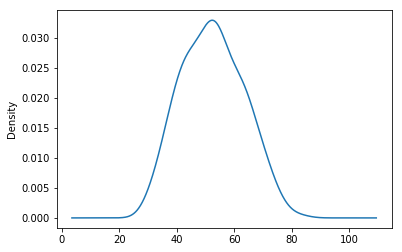

In [25]:

df['Age'].plot.density() #creates a density plot for age distribution

In [0]:
age_bin = pd.cut(df['Age'],5) #seperates the age into five evenly spaced bins

In [31]:
ct = pd.crosstab(age_bin, df['Survival Class']) #creates a cross tab table for the age groups bin and if they survived past 5 years or not
print(ct)

Survival Class   0   1
Age                   
(29.947, 40.6]  39   4
(40.6, 51.2]    68  31
(51.2, 61.8]    69  27
(61.8, 72.4]    43  16
(72.4, 83.0]     6   3


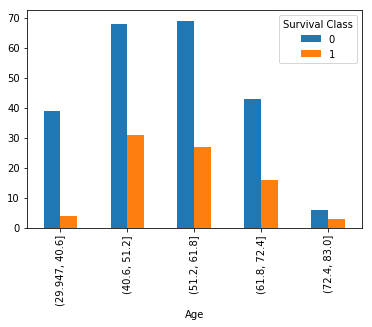

In [32]:
ct.plot(kind='bar') #creates bar graph on the cross tab data

Survival Class               0         1
Num + Nodes Detected                    
(-0.052, 10.4]        0.924444  0.716049
(10.4, 20.8]          0.048889  0.185185
(20.8, 31.2]          0.022222  0.074074
(31.2, 41.6]          0.000000  0.012346
(41.6, 52.0]          0.004444  0.012346


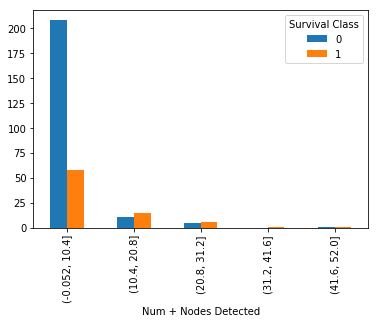

In [35]:
node_bin = pd.cut(df['Num + Nodes Detected'],5) #one more graph and table to visualize the data
ct1 = pd.crosstab(node_bin,df['Survival Class'], normalize='columns') #creates a normalized crosstab
print(ct1)
ct2 = pd.crosstab(node_bin,df['Survival Class'])
ct2.plot(kind='bar') 

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [50]:
# TODO
df_1=df #creates another data set as a current copy of the original data frame
df_1.head(5)


,Age,Year of Op,Num + Nodes Detected,Survival Class
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


In [51]:
df_1.drop(index=1, columns='Survival Class') #takes all those who passed away in five years and removing their row contents from the new data frame



,Age,Year of Op,Num + Nodes Detected
0,30,64,1
2,30,65,0
3,31,59,2
4,31,65,4
5,33,58,10
6,33,60,0
7,34,59,0
8,34,66,9
9,34,58,30
10,34,60,1


In [52]:
df_dropzero = df.drop(index=0, columns='Survival Class') #removes all those who lived more than five years in a new data frame called df_dropzero
df_dropzero.head()

,Age,Year of Op,Num + Nodes Detected
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4
5,33,58,10


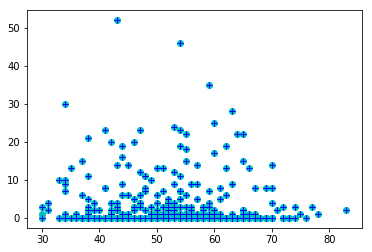

In [61]:
plt.plot(df_1['Age'], df_1['Num + Nodes Detected'], 'co', df_dropzero['Age'], df_dropzero['Num + Nodes Detected'], 'b+',) #tries to plot both number of nodes detected versus age for the two data frames


Text(0, 0.5, '+ Nodes Detected')

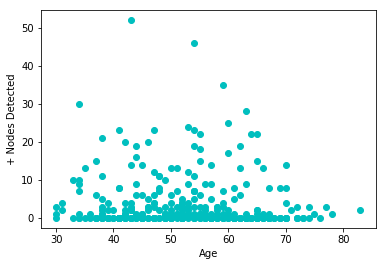

In [93]:
plt.plot(df_1['Age'], df_1['Num + Nodes Detected'], 'co')
plt.xlabel('Age')
plt.ylabel('+ Nodes Detected')

Text(0, 0.5, '+ Nodes Detected')

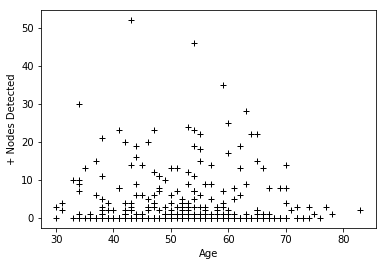

In [94]:
plt.plot(df_dropzero['Age'], df_dropzero['Num + Nodes Detected'], 'k+')
plt.xlabel('Age')
plt.ylabel('+ Nodes Detected')

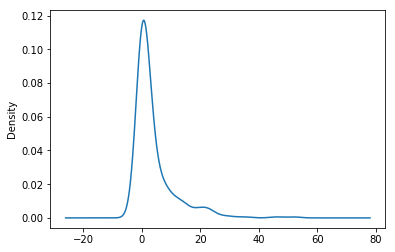

In [62]:
df_1['Num + Nodes Detected'].plot.density() #creates a density plot of the dataframe with all the 1's taken out

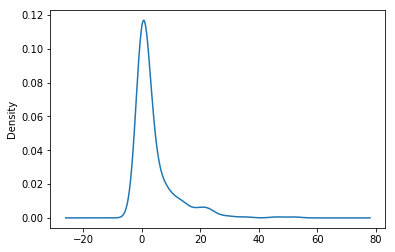

In [63]:
df_dropzero['Num + Nodes Detected'].plot.density() ##creates a density plot of the dataframe with all the 0's taken out

In [0]:
#df.head(10)
#df_removedones = df.drop(index=1, columns='Survival Class')
#df_removedzeros = df.drop(index=0, columns='Survival Class')

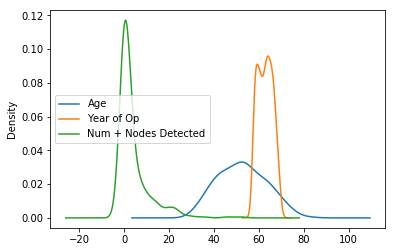

In [67]:
df_removedones.plot.density() #creates a density plot of all headers for removedones DF

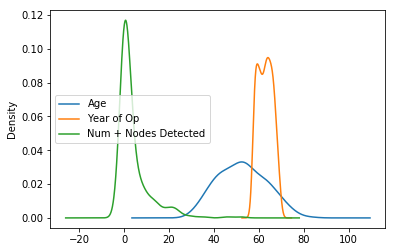

In [68]:
df_removedzeros.plot.density() #creates a density plot of all headers for removedzeros DF

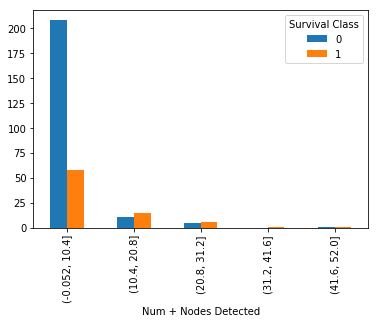

In [69]:
ct_surv = pd.crosstab(node_bin, df['Survival Class']) #creates cross tab of node bins versus survival class
ct_surv.plot(kind='bar') #Another analysis of the survival classes in a bar graph

Num + Nodes Detected        0         1     2     3  ...    30   35   46   52
Age                                                  ...                     
(29.947, 40.6]        0.139706  0.121951  0.20  0.10 ...   1.0  0.0  0.0  0.0
(40.6, 51.2]          0.294118  0.365854  0.35  0.30 ...   0.0  0.0  0.0  1.0
(51.2, 61.8]          0.264706  0.365854  0.25  0.45 ...   0.0  1.0  1.0  0.0
(61.8, 72.4]          0.272059  0.097561  0.15  0.05 ...   0.0  0.0  0.0  0.0
(72.4, 83.0]          0.029412  0.048780  0.05  0.10 ...   0.0  0.0  0.0  0.0

[5 rows x 31 columns]


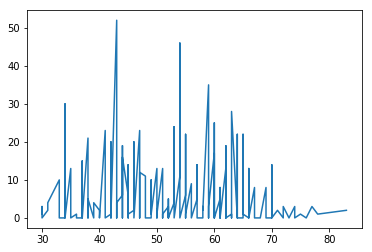

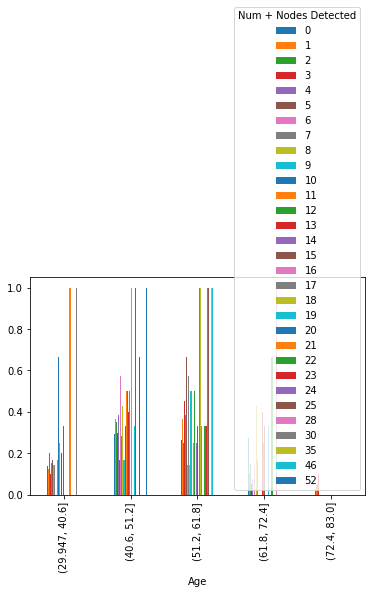

In [85]:
ct_age = pd.crosstab(age_bin, df['Num + Nodes Detected'], normalize='columns') #creates cross tab for age bins and number of nodes detected then normalizes the data and makes a bar graph
print(ct_age)
plt.plot(df['Age'],df['Num + Nodes Detected'])
ct_age.plot(kind='bar')

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Your Text Answer Here

Survival Class         0         1
Year of Op                        
58              0.106667  0.148148
59              0.080000  0.111111
60              0.106667  0.049383
61              0.102222  0.037037
62              0.071111  0.086420
63              0.097778  0.098765
64              0.102222  0.098765
65              0.066667  0.160494
66              0.097778  0.074074
67              0.093333  0.049383
68              0.044444  0.037037
69              0.031111  0.049383


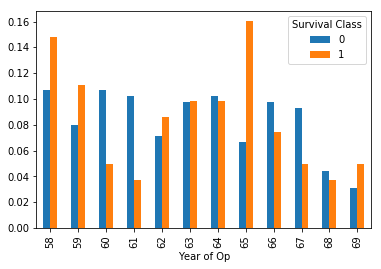

In [77]:
# Any Supplemental Code for Analysis Here
ct_op = pd.crosstab(df['Year of Op'], df['Survival Class'], normalize='columns') #cross tab evaluating survival with year of operation
print(ct_op)
ct_op.plot(kind='bar')

Survival Class               0         1
Num + Nodes Detected                    
(-0.052, 10.4]        0.924444  0.716049
(10.4, 20.8]          0.048889  0.185185
(20.8, 31.2]          0.022222  0.074074
(31.2, 41.6]          0.000000  0.012346
(41.6, 52.0]          0.004444  0.012346


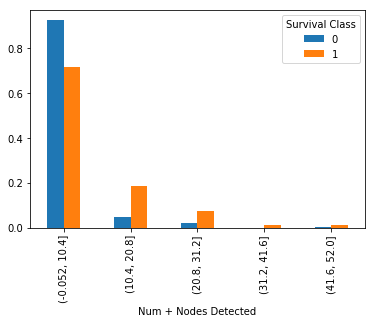

In [84]:
ct_aux = pd.crosstab(node_bin, df['Survival Class'], normalize='columns') #node bin and survival class cross tab
ct_aux.plot(kind='bar')
print(ct_aux)

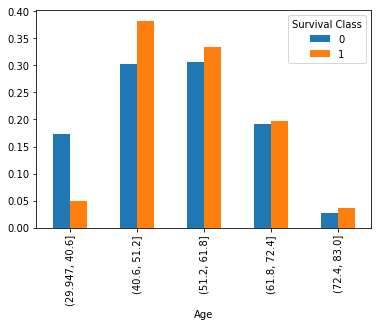

In [80]:
ct_age = pd.crosstab(age_bin, df['Survival Class'], normalize='columns') #age bin and survival class cross tab
ct_age.plot(kind='bar')

In [91]:
ctnew = pd.crosstab(age_bin, [df['Survival Class'], node_bin])
print(ctnew)

Survival Class                    0     ...                 1
Num + Nodes Detected (-0.052, 10.4]     ...      (41.6, 52.0]
Age                                     ...                  
(29.947, 40.6]                   35     ...                 0
(40.6, 51.2]                     63     ...                 1
(51.2, 61.8]                     64     ...                 0
(61.8, 72.4]                     40     ...                 0
(72.4, 83.0]                      6     ...                 0

[5 rows x 9 columns]



4.1 What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)


The one feature that appears to have a positive relationship with survival rate is difficult to pinpoint using my tables and graphs. Even when I created two data frames that contained the values between those who had surivie over five years and those who didn't I did not see a large difference. I have tried to find an obvious relationship to no avail. 
It appears the younger patients have higher chances of surviving later. However, the year the operation occured does not show clear cut positive trend relating to the rate of survival chances. 

4.2 What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)

The one feature that appears to have a negative relationship with survival is the amount of positive auxillary nodes detected. As this value increases there appears to be more people who are unable to make it past five years. 


4. 3 How are those two features related with each other, and what might that mean?

The two features are intermingled in several ways. First of all the younger you are the more the chance of survival. These features are related because as number of positve nodes increase the survival rate decreases. The trends in this data were very difficult to see with the naked eye so I highly recommend running regressions and statistics on the data to gain further insight and certainty. 